In [1]:
import HMC5883L_Library as hmc
%matplotlib inline

Iteration #0
--------------------------------------------------
Enter desired data points: 
160
--------------------------------------------------
Time remaining: 2seconds
--------------------------------------------------
        X      Y     Z
159  1.87   8.71  5.86
158 -2.13 -12.29 -2.14
157 -1.13  -1.29 -5.14
156 -0.13   6.71  5.86
155 -0.13  -6.29 -6.14
154  2.87   3.71  7.86
153 -0.13  -3.29 -3.14
152  1.87   0.71  4.86
151 -4.13  -1.29 -5.14
150  1.87  -0.29  2.86
149 -0.13  -1.29 -1.14
148 -1.13   2.71  2.86
147 -4.13  -1.29 -5.14
146 -0.13 -11.29  3.86
145  0.87  -0.29 -1.14
144 -3.13  -3.29 -0.14
143  0.87   1.71 -2.14
142  0.87  -1.29 -0.14
141  2.87  -3.29  1.86
140  0.87  -2.29 -0.14
139 -1.13   0.71 -0.14
138 -0.13   0.71 -1.14
137  1.87  -3.29  2.86
136 -2.13   0.71 -5.14
135  1.87  -0.29  6.86
134 -2.13  -2.29 -6.14
133  2.87   7.71  3.86
132 -3.13  -3.29 -5.14
131  0.87   5.71  5.86
130 -1.13  -6.29 -9.14
..    ...    ...   ...
29  -0.13  -3.29  6.86
28  -1.13  -3.29 -

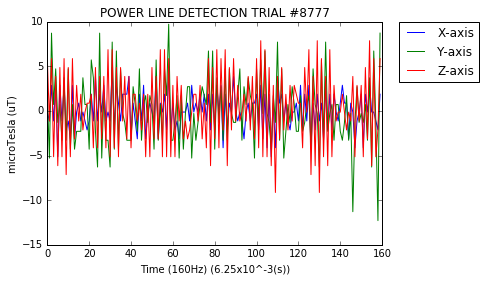

--------------------------------------------------
Saved #8777 in: /home/jared/Desktop/mfvd/Saves


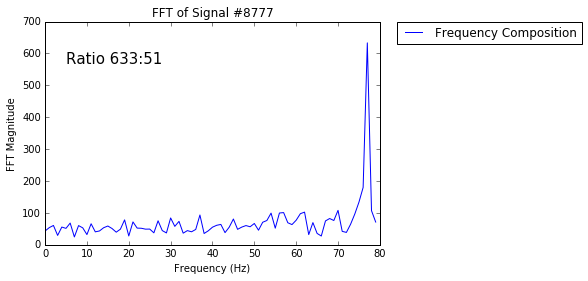

--------------------------------------------------
Do you want to Quit? [Y / n]


In [ ]:
###  MAIN PROGRAM   ###

# Prompts user to configure settings/options associated with the HMC5883L.
hmc.Settings_Config()

i = 0

# Entire program runs on a loop until explicitly exited.
while(1):
    
    # Clears output terminal.
    hmc.clear_output()
    
    # Responisble for prompting user and recording the input.
    hmc.Prompt_Iteration_Amount(i)
    
    # Prepares the ESP32 for data transmission.
    hmc.Begin_Signal()

    hmc.Set_Average()
    
    # Constantly reads in 1 seconds worth of data (160 data points). Prints out
    #   strength of signal based on min and max of the FFT's frequency ratio.
    if(hmc.Operation_Mode == "CONTINUOUS_MODE"):
        while(1):
            
            # Collects incoming data from the ESP32/HMC5883L.
            df = hmc.Collect_Data()
            
            # Clears output terminal.
            hmc.clear_output()

            # Displays signal strength to screen.
            hmc.Display_Signal_Strength(df,i)
    
    # Reads in a user set amount of data. Proceeds to save/print out results in table/graph form.
    elif(hmc.Operation_Mode == "STATIONARY_MODE"):
        
        # Estimates time until completion of data collection and plotting.
        hmc.Time_Until_Done()
        
        # Collects incoming data from the ESP32/HMC5883L.
        df = hmc.Collect_Data()
        
        # Displays the data collected from the magnetometer.
        hmc.Display_Table(df) #DataFrame Table
        hmc.Display_DF(df,i)  #DataFrame Graph
        hmc.Display_FFT(df)   #DataFrame FFT

        # Prompts user to decide if they wish to continue or quit.
        print("Do you want to Quit? [Y / n]")
        quit = input()
        if(quit == 'Y'):
            # Closes serial port.
            hmc.Serial_Close()
            break
        else:
            i = i + 1